In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\zzuge\\공시지가 예측.csv')

In [3]:
df=df.drop(['Unnamed: 0', 'X'],axis=1)

In [4]:
df

,y,x1,demand,lon,lat,pred.y
0,0.001037,0.0,0.001037,127.13,37.03,4.847306
1,0.001044,0.0,0.001044,127.14,37.03,4.845516
2,0.001557,0.0,0.001557,127.10,37.04,4.865812
3,0.002230,0.0,0.002230,127.11,37.04,4.854352
4,0.002834,0.0,0.002834,127.12,37.04,4.846560
...,...,...,...,...,...,...
1684,0.031724,0.0,0.031724,127.13,37.50,5.601961
1685,0.019321,0.0,0.019321,127.14,37.50,5.592442
1686,0.010264,0.0,0.010264,127.15,37.50,5.582171
1687,0.004781,0.0,0.004781,127.16,37.50,5.569836


In [5]:
df=df[df['demand'] <0]
df['demand']=-(df['demand'])
df['demand']=round(df['demand'])
df=df[df['demand']>0]

C:\Users\zzuge\AppData\Local\Temp\ipykernel_8000\3264115712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['demand']=-(df['demand'])
C:\Users\zzuge\AppData\Local\Temp\ipykernel_8000\3264115712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['demand']=round(df['demand'])


In [6]:
df['pred.y']=10**df['pred.y']

C:\Users\zzuge\AppData\Local\Temp\ipykernel_8000\1734239176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred.y']=10**df['pred.y']


In [7]:
df['cost']=df['demand']*df['pred.y']

C:\Users\zzuge\AppData\Local\Temp\ipykernel_8000\4149238461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cost']=df['demand']*df['pred.y']


In [8]:
total_demand=df['demand'].sum()

In [9]:
total_demand

1906.0

In [10]:
df=df.sort_values('demand',ascending=False)

In [11]:
df

,y,x1,demand,lon,lat,pred.y,cost
814,0.414236,8.552599,11.0,127.30,37.23,187879.946135,2.066679e+06
813,0.455939,8.726822,11.0,127.29,37.23,196727.107264,2.163998e+06
812,0.559243,8.607155,11.0,127.28,37.23,203482.611154,2.238309e+06
1228,1.299354,9.309836,11.0,127.25,37.34,231545.728157,2.547003e+06
678,0.358433,8.171258,10.0,127.32,37.20,165154.636330,1.651546e+06
...,...,...,...,...,...,...,...
747,5.647325,5.154793,1.0,127.08,37.22,399429.270360,3.994293e+05
710,3.836308,3.889777,1.0,127.17,37.21,418205.635668,4.182056e+05
1186,1.452083,1.523880,1.0,127.19,37.33,278804.725881,2.788047e+05
712,4.049032,3.610918,1.0,127.19,37.21,433989.286889,4.339893e+05


In [12]:
df['demand_cumsum']=df['demand'].cumsum()

In [13]:
df['cost_cumsum']=df['cost'].cumsum()

In [14]:
df

,y,x1,demand,lon,lat,pred.y,cost,demand_cumsum,cost_cumsum
814,0.414236,8.552599,11.0,127.30,37.23,187879.946135,2.066679e+06,11.0,2.066679e+06
813,0.455939,8.726822,11.0,127.29,37.23,196727.107264,2.163998e+06,22.0,4.230678e+06
812,0.559243,8.607155,11.0,127.28,37.23,203482.611154,2.238309e+06,33.0,6.468986e+06
1228,1.299354,9.309836,11.0,127.25,37.34,231545.728157,2.547003e+06,44.0,9.015989e+06
678,0.358433,8.171258,10.0,127.32,37.20,165154.636330,1.651546e+06,54.0,1.066754e+07
...,...,...,...,...,...,...,...,...,...
747,5.647325,5.154793,1.0,127.08,37.22,399429.270360,3.994293e+05,1902.0,4.023318e+08
710,3.836308,3.889777,1.0,127.17,37.21,418205.635668,4.182056e+05,1903.0,4.027500e+08
1186,1.452083,1.523880,1.0,127.19,37.33,278804.725881,2.788047e+05,1904.0,4.030288e+08
712,4.049032,3.610918,1.0,127.19,37.21,433989.286889,4.339893e+05,1905.0,4.034628e+08


In [15]:
df['demand_cumsum']=total_demand-df['demand_cumsum']
df

,y,x1,demand,lon,lat,pred.y,cost,demand_cumsum,cost_cumsum
814,0.414236,8.552599,11.0,127.30,37.23,187879.946135,2.066679e+06,1895.0,2.066679e+06
813,0.455939,8.726822,11.0,127.29,37.23,196727.107264,2.163998e+06,1884.0,4.230678e+06
812,0.559243,8.607155,11.0,127.28,37.23,203482.611154,2.238309e+06,1873.0,6.468986e+06
1228,1.299354,9.309836,11.0,127.25,37.34,231545.728157,2.547003e+06,1862.0,9.015989e+06
678,0.358433,8.171258,10.0,127.32,37.20,165154.636330,1.651546e+06,1852.0,1.066754e+07
...,...,...,...,...,...,...,...,...,...
747,5.647325,5.154793,1.0,127.08,37.22,399429.270360,3.994293e+05,4.0,4.023318e+08
710,3.836308,3.889777,1.0,127.17,37.21,418205.635668,4.182056e+05,3.0,4.027500e+08
1186,1.452083,1.523880,1.0,127.19,37.33,278804.725881,2.788047e+05,2.0,4.030288e+08
712,4.049032,3.610918,1.0,127.19,37.21,433989.286889,4.339893e+05,1.0,4.034628e+08


In [16]:
df['idx']=range(0,len(df))
df=df.set_index('idx')

In [17]:
df

,y,x1,demand,lon,lat,pred.y,cost,demand_cumsum,cost_cumsum
idx,,,,,,,,,
0,0.414236,8.552599,11.0,127.30,37.23,187879.946135,2.066679e+06,1895.0,2.066679e+06
1,0.455939,8.726822,11.0,127.29,37.23,196727.107264,2.163998e+06,1884.0,4.230678e+06
2,0.559243,8.607155,11.0,127.28,37.23,203482.611154,2.238309e+06,1873.0,6.468986e+06
3,1.299354,9.309836,11.0,127.25,37.34,231545.728157,2.547003e+06,1862.0,9.015989e+06
4,0.358433,8.171258,10.0,127.32,37.20,165154.636330,1.651546e+06,1852.0,1.066754e+07
...,...,...,...,...,...,...,...,...,...
365,5.647325,5.154793,1.0,127.08,37.22,399429.270360,3.994293e+05,4.0,4.023318e+08
366,3.836308,3.889777,1.0,127.17,37.21,418205.635668,4.182056e+05,3.0,4.027500e+08
367,1.452083,1.523880,1.0,127.19,37.33,278804.725881,2.788047e+05,2.0,4.030288e+08


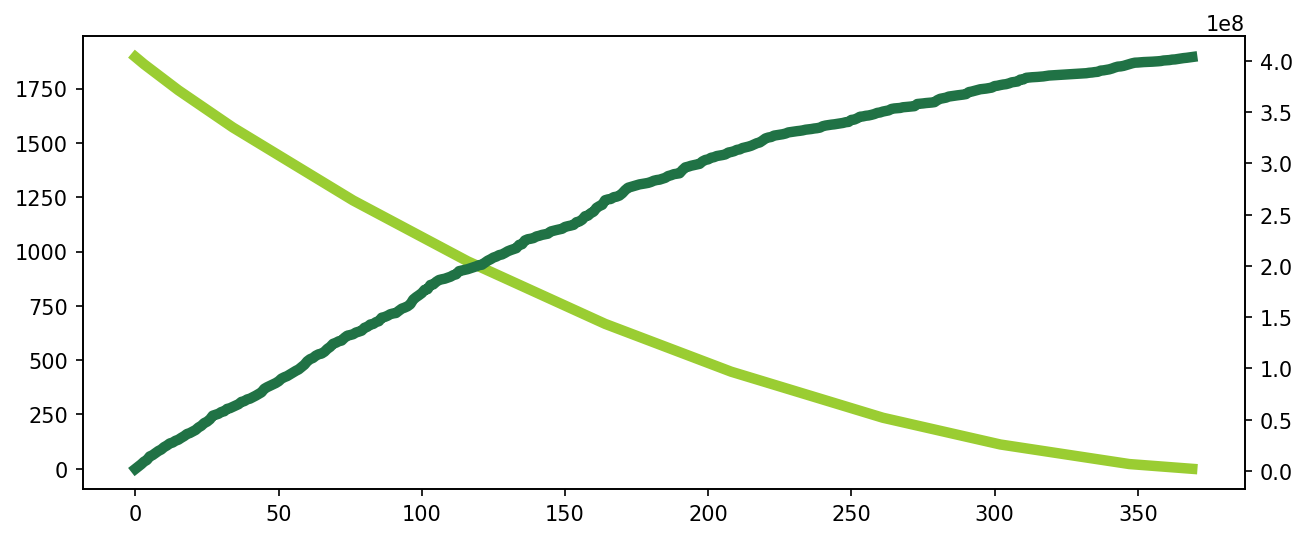

In [31]:
fig, ax1= plt.subplots(figsize=(10,4),dpi=150)
ax1.plot(df['demand_cumsum'],label='demand',linewidth="5",color='yellowgreen')
ax2 = ax1.twinx()
plt.plot(df['cost_cumsum'],label='cost',linewidth="5",color='#207245')
plt.show()



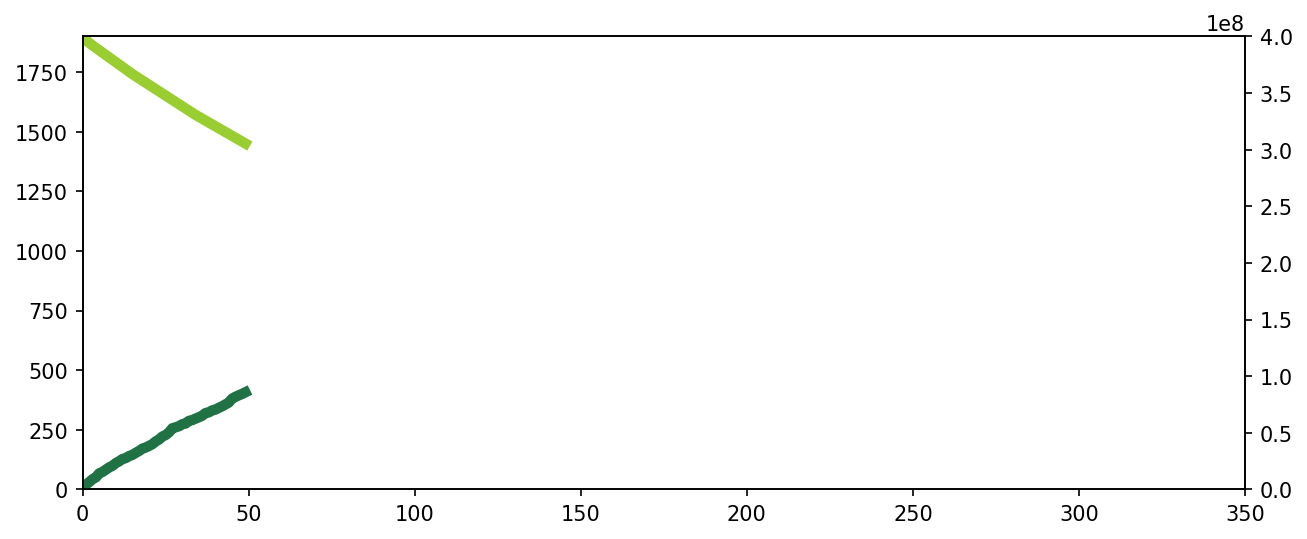

In [35]:
fig, ax1= plt.subplots(figsize=(10,4),dpi=150)
ax1.plot(df.iloc[0:50,:]['demand_cumsum'],label='demand',linewidth="5",color='yellowgreen')
plt.xlim(0,350)
plt.ylim(0,1900)
ax2 = ax1.twinx()
plt.plot(df.iloc[0:50,:]['cost_cumsum'],label='cost',linewidth="5",color='#207245')
plt.ylim(0,400000000)
plt.savefig( 'C:\\Users\\zzuge\\simul1.png' )
plt.show()


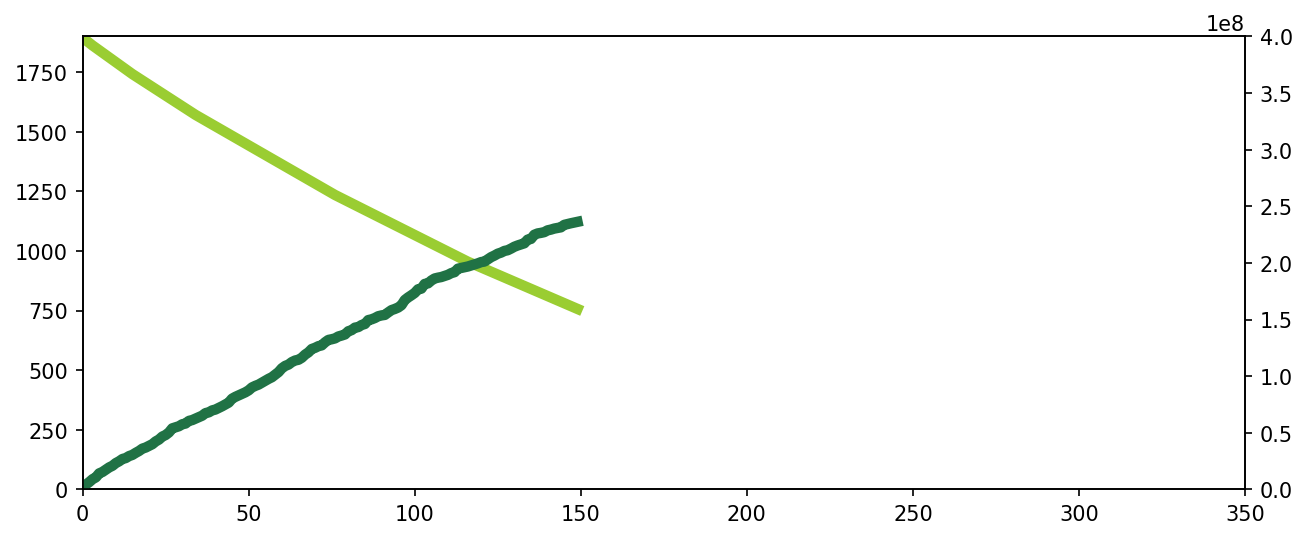

In [36]:
fig, ax1= plt.subplots(figsize=(10,4),dpi=150)
ax1.plot(df.iloc[0:150,:]['demand_cumsum'],label='demand',linewidth="5",color='yellowgreen')
plt.xlim(0,350)
plt.ylim(0,1900)
ax2 = ax1.twinx()
plt.plot(df.iloc[0:150,:]['cost_cumsum'],label='cost',linewidth="5",color='#207245')
plt.ylim(0,400000000)
plt.savefig( 'C:\\Users\\zzuge\\simul2.png' )
plt.show()


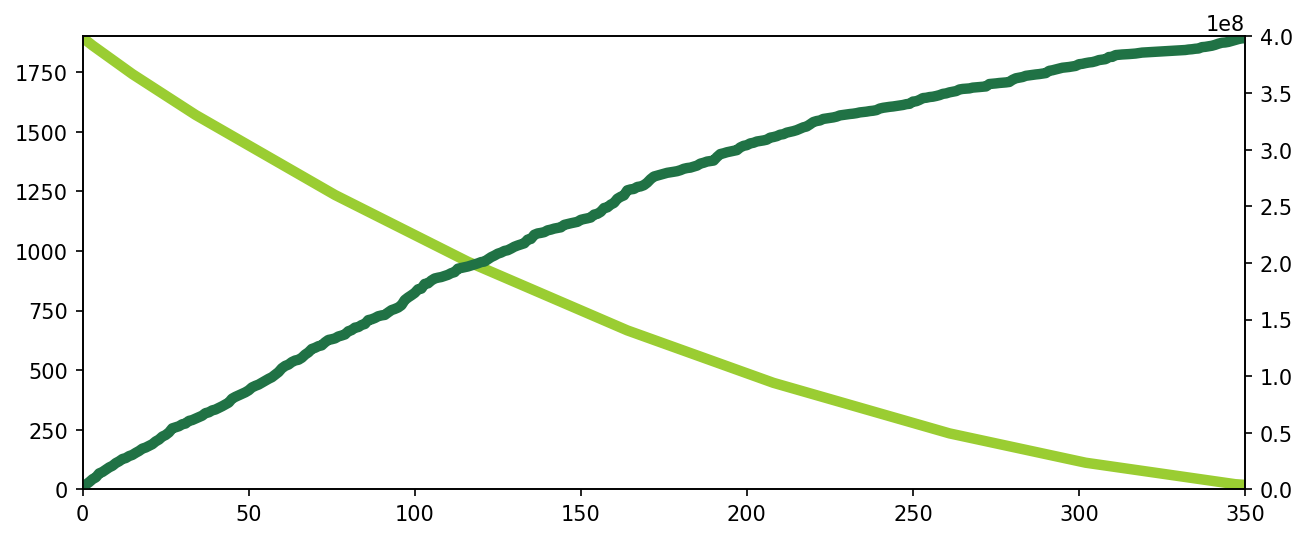

In [37]:
fig, ax1= plt.subplots(figsize=(10,4),dpi=150)
ax1.plot(df.iloc[0:,:]['demand_cumsum'],label='demand',linewidth="5",color='yellowgreen')
plt.xlim(0,350)
plt.ylim(0,1900)
ax2 = ax1.twinx()
plt.plot(df.iloc[0:,:]['cost_cumsum'],label='cost',linewidth="5",color='#207245')
plt.ylim(0,400000000)
plt.savefig( 'C:\\Users\\zzuge\\simul3.png' )
plt.show()
